In [7]:
#In this assignment students have to transform iris data into 3 dimensions
# and plot a 3d chart with transformed dimensions 
# and colour each data point with specific class.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets

In [4]:
import pandas as pd
import seaborn as sns

In [6]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
X = df.drop('species', axis=1)
y = df['species']

In [10]:
#transform iris data into 3 dimensions
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(X), columns=['pca1','pca2','pca3'])
pca_df

,pca1,pca2,pca3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [29]:
pca_df = pd.concat([df['species'], pca_df], axis=1)
pca_df

,species,pca1,pca2,pca3
0,setosa,-2.684126,0.319397,-0.027915
1,setosa,-2.714142,-0.177001,-0.210464
2,setosa,-2.888991,-0.144949,0.017900
3,setosa,-2.745343,-0.318299,0.031559
4,setosa,-2.728717,0.326755,0.090079
...,...,...,...,...
145,virginica,1.944110,0.187532,0.177825
146,virginica,1.527167,-0.375317,-0.121898
147,virginica,1.764346,0.078859,0.130482
148,virginica,1.900942,0.116628,0.723252


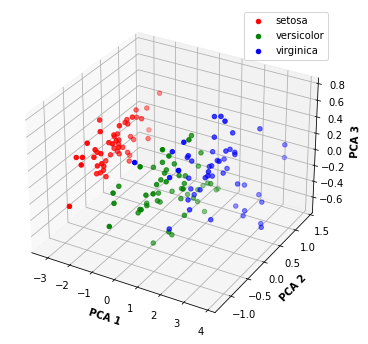

In [56]:
#plot a 3d chart with transformed dimensions and colour each data point with specific class.

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('PCA 1', fontweight ='bold')
ax.set_ylabel('PCA 2', fontweight ='bold')
ax.set_zlabel('PCA 3', fontweight ='bold')
target_list = list(pca_df.species.unique())
colors = ['r','g','b']
for target, color in zip(target_list, colors):
    ax.scatter(xs=pca_df.loc[pca_df.species==target,'pca1'], ys=pca_df.loc[pca_df.species==target,'pca2'], zs=pca_df.loc[pca_df.species==target,'pca3'], c=color)
    ax.legend(target_list)